In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('yan.csv',engine='python')

In [4]:
data=data.iloc[:,1:]

In [5]:
data

,螺纹钢表现需求,钢材,全国建筑钢材成交量,钢厂直供量,水泥开工全国算数平均,其他资金:累计值,其他资金:定金及预收款:累计值,房屋竣工面积:累计同比,房屋竣工面积_累计值,房屋施工面积,房屋施工面积:当月同比,房屋施工面积_累计值,房屋施工面积_累计同比,房屋新开工面积_当月值,房地产开发投资完成额_当月值,非制造业PMI_建筑业_新订单,商品房销售面积_当月值
0,1216.57,3747.510000,2218017.00,1761329.70,1.32,26637.41,15115.47,23.31,16971.33,15358.68,4.77,610759.47,5.84,14140.71,8838.31,49.30,12149.61
1,198.01,1155.394286,772842.00,543035.31,0.80,8572.82,4806.12,28.92,13941.84,16681.45,5.87,603543.72,5.87,15620.21,9051.79,48.10,11234.56
2,1475.84,5047.550000,4390144.00,2372348.50,1.80,14007.07,7881.56,17.70,20000.82,14431.49,3.66,617975.21,5.81,12661.21,8624.83,50.50,13064.65
3,1616.21,4253.650000,3765469.00,1999215.50,2.21,19915.36,11369.86,20.12,25478.22,16285.86,4.65,634261.07,5.78,15144.01,7699.02,50.00,11713.04
4,1076.59,3848.660000,3389333.00,1808870.20,2.44,26051.37,14839.90,20.35,32027.70,17077.04,-1.42,651338.11,5.58,16096.18,9188.47,52.10,11941.97
5,1698.65,5007.150000,3520423.00,2353360.50,2.22,33314.20,18933.55,20.05,39545.96,18412.38,-10.88,669750.49,5.05,18015.32,12066.42,58.80,16348.28
6,1308.98,3915.700000,3255400.00,1840379.00,2.17,39306.77,22321.47,21.33,45903.78,15855.18,-4.54,685605.68,4.80,15407.26,8729.98,56.50,11457.70
7,1550.34,4806.460000,3502088.00,2259036.20,2.21,45294.30,25655.84,19.11,50592.30,14515.30,-4.42,700120.98,4.60,13889.41,9026.24,50.80,11690.58
8,1241.73,3830.350000,3475346.00,1800264.50,2.29,52129.11,29617.80,12.06,57111.81,15907.91,-34.52,716028.88,3.23,15821.73,10210.85,55.90,17733.76
9,1401.50,4071.820000,3001158.00,1913755.40,2.45,59070.57,33654.94,6.55,65211.16,14951.93,5.64,730980.81,3.27,14720.08,9377.02,54.20,15153.75


In [6]:
data.shape

(56, 17)

In [7]:
sequence_length = 4
delay = 1

In [8]:
data_ = []
for i in range(len(data) - sequence_length - delay):
    data_.append(data.iloc[i: i + sequence_length + delay])

In [9]:
data_ = np.array([df.values for df in data_])

In [10]:
np.random.shuffle(data_)

In [11]:
data_.shape

(51, 5, 17)

In [12]:
x = data_[:, :-delay, :]
y = data_[:, -1, 0]

In [13]:
x

array([[[1.29932000e+03, 3.99030000e+03, 4.06141500e+06, ...,
         1.21461900e+04, 5.57000000e+01, 1.68392500e+04],
        [1.42460000e+03, 4.14992000e+03, 3.70917702e+06, ...,
         1.06598800e+04, 5.62000000e+01, 1.38040800e+04],
        [1.76285000e+03, 5.21172000e+03, 3.61016670e+06, ...,
         1.07580900e+04, 5.65000000e+01, 1.54870800e+04],
        [1.33255000e+03, 3.96361000e+03, 3.31828957e+06, ...,
         1.01805100e+04, 5.65000000e+01, 2.30504300e+04]],

       [[1.54699000e+03, 4.36562000e+03, 4.52191744e+06, ...,
         1.34189400e+04, 5.51000000e+01, 1.73304400e+04],
        [1.80457000e+03, 5.14985000e+03, 3.94428053e+06, ...,
         1.15950000e+04, 5.48000000e+01, 1.40720000e+04],
        [1.54147000e+03, 4.35695000e+03, 4.37472900e+06, ...,
         1.16620000e+04, 5.60000000e+01, 1.56540000e+04],
        [1.38485000e+03, 4.10697000e+03, 3.50867100e+06, ...,
         1.09290000e+04, 5.29000000e+01, 2.26530000e+04]],

       [[1.42460000e+03, 4.14992000e

In [14]:
y

array([1356.61, 1271.91,  549.15, 1299.32, 1281.56,  284.17, 1550.34,
       1384.85, 1698.65, 1804.57, 1401.5 ,  638.29, 1813.44, 1401.58,
       1538.55, 1435.89, 1278.95, 1268.14,  118.23, 1762.85, 1332.55,
       1277.14, 1789.17, 1613.2 , 1487.32, 1275.01, 1546.99, 1101.26,
       1942.68, 1241.73, 1192.18, 1609.7 , 1772.13, 1631.34, 1308.98,
       1308.29, 1330.26, 1617.81, 1790.75, 1819.3 ,  970.33, 1501.46,
       1639.03, 1541.47, 1516.59, 1424.6 , 1640.96, 1735.88, 1076.59,
       1257.03, 1966.89])

In [15]:
split_boundary = int(data_.shape[0] * 0.8)

In [16]:
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [17]:
train_x

array([[[1.29932000e+03, 3.99030000e+03, 4.06141500e+06, ...,
         1.21461900e+04, 5.57000000e+01, 1.68392500e+04],
        [1.42460000e+03, 4.14992000e+03, 3.70917702e+06, ...,
         1.06598800e+04, 5.62000000e+01, 1.38040800e+04],
        [1.76285000e+03, 5.21172000e+03, 3.61016670e+06, ...,
         1.07580900e+04, 5.65000000e+01, 1.54870800e+04],
        [1.33255000e+03, 3.96361000e+03, 3.31828957e+06, ...,
         1.01805100e+04, 5.65000000e+01, 2.30504300e+04]],

       [[1.54699000e+03, 4.36562000e+03, 4.52191744e+06, ...,
         1.34189400e+04, 5.51000000e+01, 1.73304400e+04],
        [1.80457000e+03, 5.14985000e+03, 3.94428053e+06, ...,
         1.15950000e+04, 5.48000000e+01, 1.40720000e+04],
        [1.54147000e+03, 4.35695000e+03, 4.37472900e+06, ...,
         1.16620000e+04, 5.60000000e+01, 1.56540000e+04],
        [1.38485000e+03, 4.10697000e+03, 3.50867100e+06, ...,
         1.09290000e+04, 5.29000000e+01, 2.26530000e+04]],

       [[1.42460000e+03, 4.14992000e

In [18]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((40, 4, 17), (11, 4, 17), (40,), (11,))

In [19]:
#mean = train_x.mean(axis=0)
#std = train_x.std(axis=0)

In [20]:
#train_x = (train_x - mean)/std

In [21]:
#test_x = (test_x - mean)/std

In [22]:
x=train_x
z=test_x

train_x=(x-x.min())/(x.max()-x.min())
test_x=(z-z.min())/(z.max()-z.min())
train_y=(train_y-train_y.min())/(train_y.max()-train_y.min())
test_y=(test_y-test_y.min())/(test_y.max()-test_y.min())

In [23]:
batch_size = 4

In [24]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [36]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae',metrics=['mse'])

In [37]:
history = model.fit(train_x, train_y,
                    batch_size = 2,
                    epochs=100,
                    validation_data=(test_x, test_y))

Train on 40 samples, validate on 11 samples
Epoch 1/100
40/40 [==============================] - 0s 9ms/sample - loss: 0.0752 - mse: 0.0126 - val_loss: 0.3421 - val_mse: 0.1493
Epoch 2/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0778 - mse: 0.0126 - val_loss: 0.3514 - val_mse: 0.1583
Epoch 3/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0753 - mse: 0.0118 - val_loss: 0.3417 - val_mse: 0.1521
Epoch 4/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0755 - mse: 0.0116 - val_loss: 0.3728 - val_mse: 0.1786
Epoch 5/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0736 - mse: 0.0113 - val_loss: 0.3425 - val_mse: 0.1538
Epoch 6/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0760 - mse: 0.0125 - val_loss: 0.3255 - val_mse: 0.1377
Epoch 7/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0779 - mse: 0.0123 - val_loss: 0.3347 - val_mse: 0.1447
Epoch 8/100
40/40 [======

40/40 [==============================] - 0s 1ms/sample - loss: 0.0712 - mse: 0.0099 - val_loss: 0.3846 - val_mse: 0.1910
Epoch 62/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0719 - mse: 0.0104 - val_loss: 0.3554 - val_mse: 0.1615
Epoch 63/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0663 - mse: 0.0097 - val_loss: 0.3615 - val_mse: 0.1674
Epoch 64/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0668 - mse: 0.0096 - val_loss: 0.3848 - val_mse: 0.1889
Epoch 65/100
40/40 [==============================] - 0s 2ms/sample - loss: 0.0661 - mse: 0.0091 - val_loss: 0.3403 - val_mse: 0.1539
Epoch 66/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0701 - mse: 0.0093 - val_loss: 0.3392 - val_mse: 0.1535
Epoch 67/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.0715 - mse: 0.0097 - val_loss: 0.3566 - val_mse: 0.1656
Epoch 68/100
40/40 [==============================] - 0s 1ms/sample - loss:

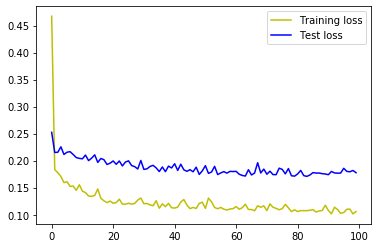

In [27]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [28]:
pre=model.predict(test_x)

In [29]:
test_y

array([1.        , 0.84084809, 0.82939179, 0.95220193, 0.54246789,
       0.        , 0.53650689, 0.6321369 , 0.76942617, 0.77226272,
       0.74368549])

In [30]:
def mse(pre,w):
    w=np.array(w)
    pre=np.array(pre)
    dis=[]
    for  i  in range(w.shape[0]):
        
        val=w[i][0]-pre[i][0]
        dis.append(val**2)
    result=np.cumsum(dis,axis=0)[-1]/len(dis)
    return result

In [31]:
result=mse(pre,test_y)

IndexError: invalid index to scalar variable.

In [32]:
pre=pre*(1966-118)+118

In [33]:
pre

array([[1564.8453],
       [1507.9696],
       [1467.0256],
       [1523.729 ],
       [1555.7858],
       [1074.8174],
       [1443.7725],
       [1586.1235],
       [1578.224 ],
       [1240.3009],
       [1630.8785]], dtype=float32)

In [34]:
test_y=test_y*(1966-118)+118

In [35]:
test_y

array([1966.        , 1671.88726598, 1650.71603119, 1877.66916453,
       1120.48065639,  118.        , 1109.46472934, 1286.18899078,
       1539.89956055, 1545.14151447, 1492.33078467])

In [49]:
result=mse(pre,test_y)

In [50]:
result

220404.0068806782

In [34]:
pre=pd.DataFrame(pre)

In [35]:
test_y=pd.DataFrame(test_y)

In [38]:
pre.to_csv('lstm_pre.csv')

In [39]:
test_y.to_csv('lstm_true.csv')

In [40]:
def mse(pre,w):
    w=np.array(w)
    dis=[]
    for  i  in range(w.shape[0]):
        
        val=w[i][0]-pre[i][0]
        dis.append(val**2)
    result=np.cumsum(dis,axis=0)[-1]/len(dis)
    return result

In [48]:
result=mse(pre,test_y)